#ICE-3: T-Test and Basic Inference Principles

### **Task 1:** Statistical Inference
#### 1. Perform the Statistical Inference on the tutorial given using the dataset attached. (10%)
#### 2. After you are successful in executing and fixing the issues with the current version use dataset of your choice and execute it again. (30%)  
#### 3. Provide your detailed analysis on the tutorial and custom dataset version. (30%)
#### 4. Answer three Exploratory Data Analysis Questions(30%)

#### **NOTE**: Please choose a dataset that is related to a different domain i.e., COVID, Traffic, Cancer Patient etc.

### Exploratory Data Analysis

Q1) Which state had the most number of accidents?

Answer: Texas is the state with most number of Accidents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Accidents data.csv')

common_causes = data['Accident State'].value_counts()

print("Common Causes of Pipeline Accidents:")
print(common_causes)


Common Causes of Pipeline Accidents:
TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
IN      57
NM      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
CO      24
NE      22
AL      21
VA      20
GA      17
SC      16
NC      15
KY      14
NY      14
AR      13
AK      11
SD       9
WA       8
UT       8
MD       8
TN       7
FL       7
ID       4
OR       4
HI       3
CT       2
WV       2
MA       2
NV       1
ME       1
PR       1
Name: Accident State, dtype: int64


In [4]:
state_accident_counts = data['Accident State'].value_counts()
state_with_most_accidents = state_accident_counts.idxmax()
print(state_with_most_accidents)

TX


Q2)How have accident rates changed over time, and what might be the reasons behind those changes?

1.There is a general increase in the number of accidents from the year 2010 to
2015.

Reason:
 This could be due to several factors including increased pipeline activities, lack of safety measures, or natural disasters.

2.A slight decrease in the number of accidents is observed in 2016.

Reason:
The decrease in 2016 might be due to improved safety measures, reduced pipeline activities, or other factors.

3.Asignificant drop in the number of accidents is observed in 2017, but this might be due to incomplete data for that year.

Reason:
This might be due to incomplete data for the year 2017 as we have only two entries for the year 2017.



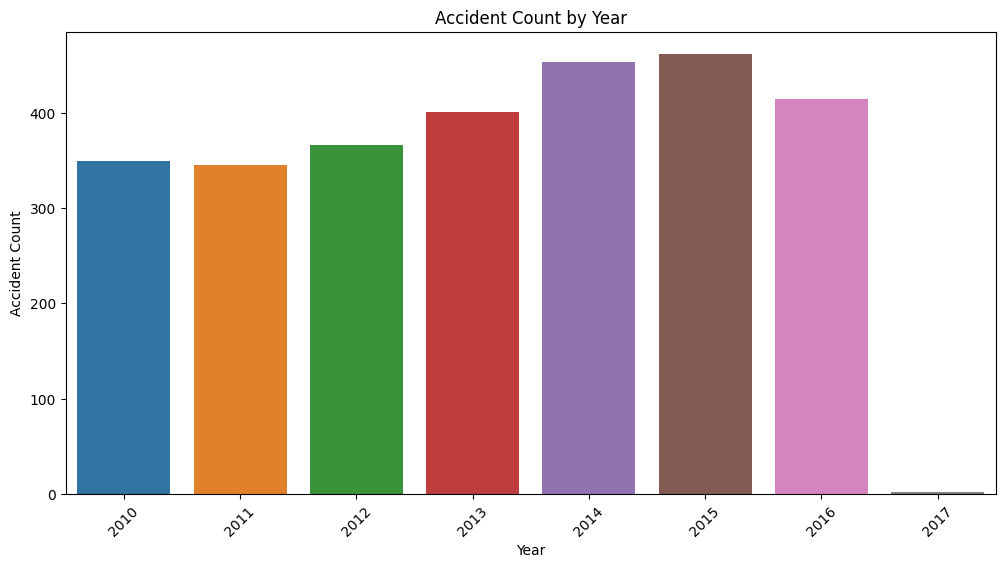

In [5]:

data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])

data['Year'] = data['Accident Date/Time'].dt.year
data['Month'] = data['Accident Date/Time'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Year')
plt.title('Accident Count by Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.show()

Q3) plot the accident rates by state

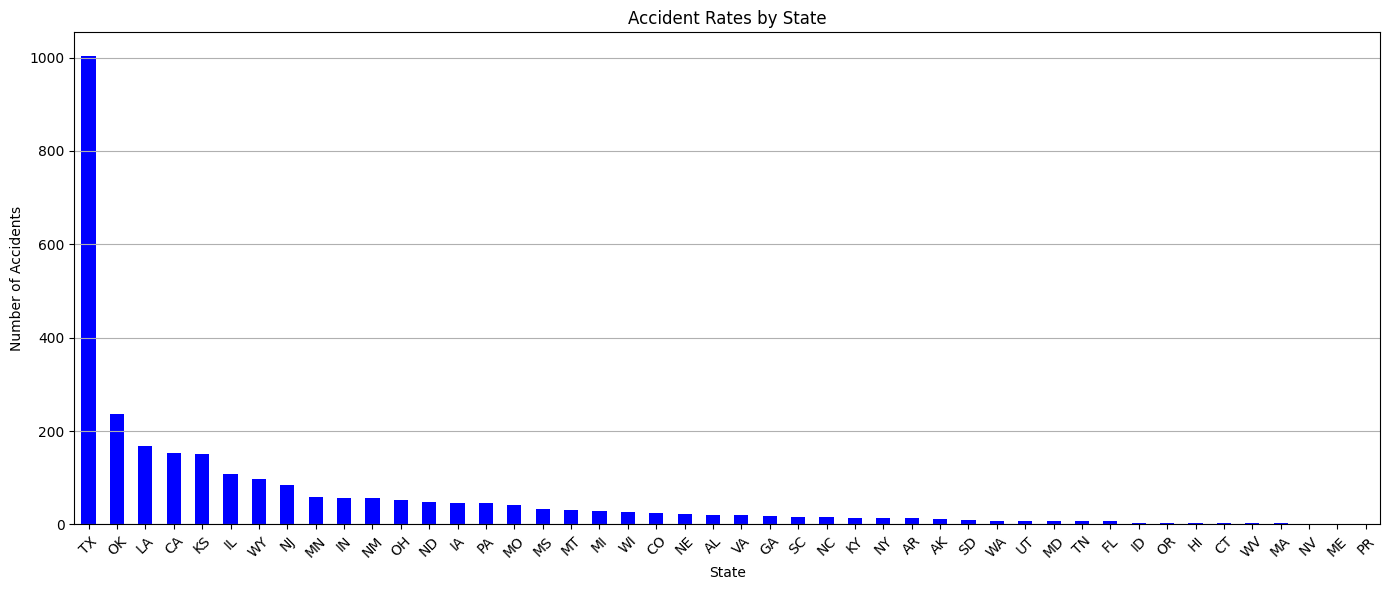

In [7]:
plt.figure(figsize=(14, 6))
state_accident_counts.plot(kind='bar', color='blue')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Accident Rates by State')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q4) What are the most common types of liquids involved in pipeline accidents in the dataset, and what is their frequency?

Form the below bar graph we can see the following liquids types along with there frequencies:

Crude Oil: Involved in 1398 accidents.

Refined and/or Petroleum Product (Non-HVL), Liquid: Involved in 939 accidents.

HVL (High Volatility Liquids) or Other Flammable or Toxic Fluid, Gas: Involved in 418 accidents.

CO2 (Carbon Dioxide): Involved in 38 accidents.

Biofuel/Alternative Fuel (including Ethanol Blends): Involved in 2 accidents.

From this data, We can conclude that "Crude Oil" is the most common type of liquid involved in pipeline accidents,

Q5) Plot the distribution of accidents by Liquid Type

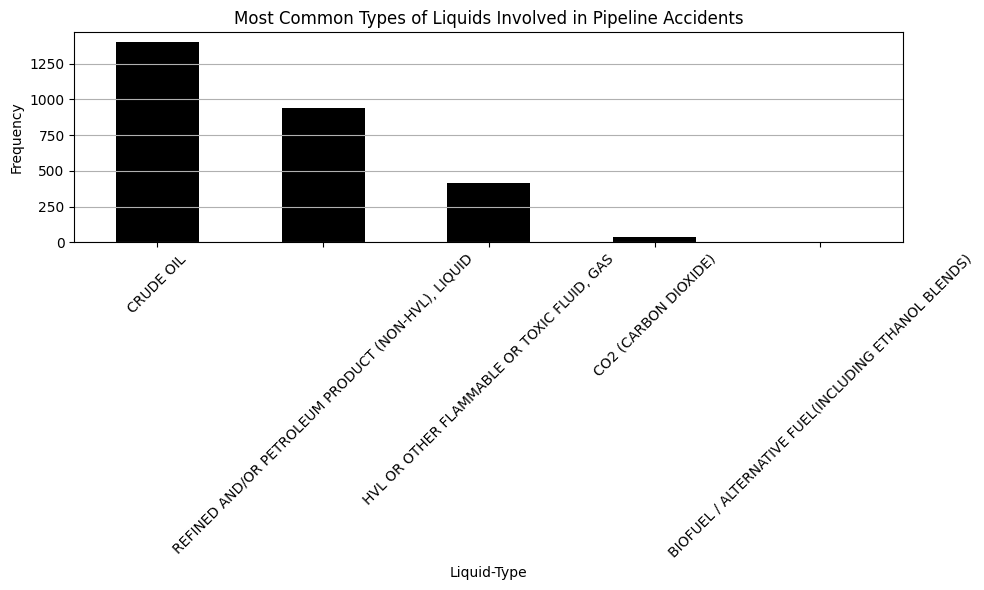

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64


In [11]:

liquid_frequency = data['Liquid Type'].value_counts()
plt.figure(figsize=(10, 6))
liquid_frequency.plot(kind='bar', color='black')
plt.xlabel('Liquid-Type')
plt.ylabel('Frequency')
plt.title('Most Common Types of Liquids Involved in Pipeline Accidents')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Returning the liquid type frequency data
print(liquid_frequency)


#Statistical Inference
Exploratory data analysis and statistical inference is performed on a dataset which contains oil pipeline accidents reported to the Pipeline and Hazardous Materials Safety Administration between 2010 and 2017.
##1. Importing the required Libraries.

In [12]:
import pandas as pd
data = pd.read_csv('Accidents data.csv')
cols_of_interest = ['Accident Date/Time','Accident State','Pipeline Location','Liquid Type','Net Loss (Barrels)','All Costs']
data = data[cols_of_interest] #remove columns not needed for this analysis
print(data.head(5))

  Accident Date/Time Accident State Pipeline Location  \
0   1/1/2010 7:15 AM             KS           ONSHORE   
1   1/4/2010 8:30 AM             ME           ONSHORE   
2  1/5/2010 10:30 AM             LA           ONSHORE   
3   1/6/2010 7:30 PM             WI           ONSHORE   
4   1/7/2010 1:00 PM             TX           ONSHORE   

                                  Liquid Type  Net Loss (Barrels)  All Costs  
0  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                21.0       1627  
1                                   CRUDE OIL                 0.0       4008  
2  HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS                 2.0        200  
3                                   CRUDE OIL                 0.0      11540  
4                                   CRUDE OIL                 2.0      29650  


Statistical Inference is the method of using the laws of probability to analyze a sample of data from a larger population to learn about the population. In this case, oil pipeline accidents in US between 2010–2017 serve as a sample from a larger population of all oil pipeline accidents in US. Let us now calculate the summary statistics around our variables of interest in the sample i.e. costs incurred and loss of oil due to oil pipeline accidents.

Looking at the summary statistics for both our variables presence of extreme values can easily be inferred because of extremely large MAX values as compared to their means and also significantly large standard deviations also indicates larger variance from the mean values of the variables. A Box-plot is a better way of visualizing this summary.

##2. Box Plot

<ipython-input-13-0719801f2432>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


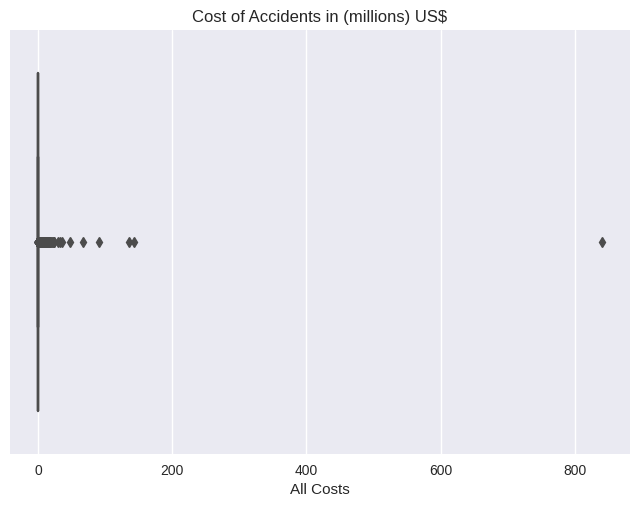

In [13]:
import seaborn  as sns
import matplotlib.pyplot as plt

data['All Costs'] = data['All Costs'] / 1000000

plt.style.use('seaborn')

sns.boxplot(data=data, x='All Costs')
plt.title('Cost of Accidents in (millions) US$')
plt.show()

plt.close()



plt.show()

#Poisson Distribution:
The Poisson Distribution models a process in which mean number of events occur in a fixed interval of time or space. The probability of events occurring in that interval is expressed by the Poisson Distribution with parameter λ and the process is called the Poisson Process. For a process to follow a Poisson Distribution the observed events cannot occur simultaneously, and the occurrence of each event is independent to the occurrence of the previous event in disjoint intervals of time or space.

In our scenario, if our assumption about oil pipeline accidents in US is correct that they do not occur simultaneously and that the occurrence of one accident has no impact on the occurrence of another accident, then the number accidents, X is a random variable with a Poisson Distribution X ~ Poisson(λ). To estimate the parameter for our distribution, we just count the number of accidents in our sample and divide it by the total time span.

In [14]:
import numpy as np
data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])
totaltimespan = np.max(data['Accident Date/Time']) - np.min(data['Accident Date/Time'])

totaltime_hour = (totaltimespan.days*24 + totaltimespan.seconds/(3600))
totaltime_month = (totaltimespan.days + totaltimespan.seconds/(3600*24)) *12/365

lmda_h = len(data) / totaltime_hour
lmda_m = len(data) / totaltime_month

print('Estimated no. of accidents per hour: {}'.format(lmda_h))
print('Estimated no. of accidents per month: {}'.format(lmda_m))

#Estimated no. of accidents per hour: 0.04540255169379675
#Estimated no. of accidents per month: 33.14386273647162

Estimated no. of accidents per hour: 0.04540255169379675
Estimated no. of accidents per month: 33.14386273647162


Using NumPy in python, a random sample form a Poisson Distribution can then be generated to model our data with estimated λ to be 33 accidents per month. Let’s see how the distribution looks like and what can be inferred from it.



<ipython-input-15-250c6e35c487>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


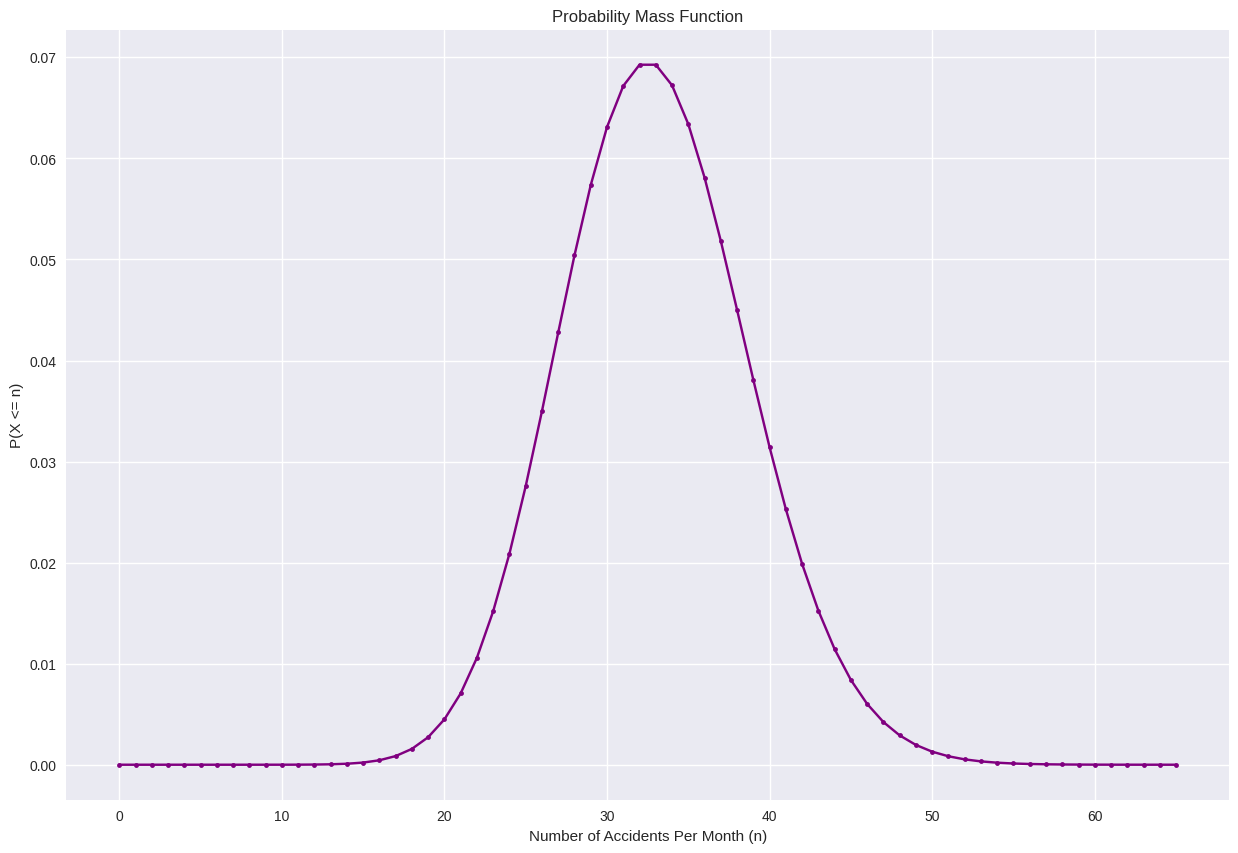

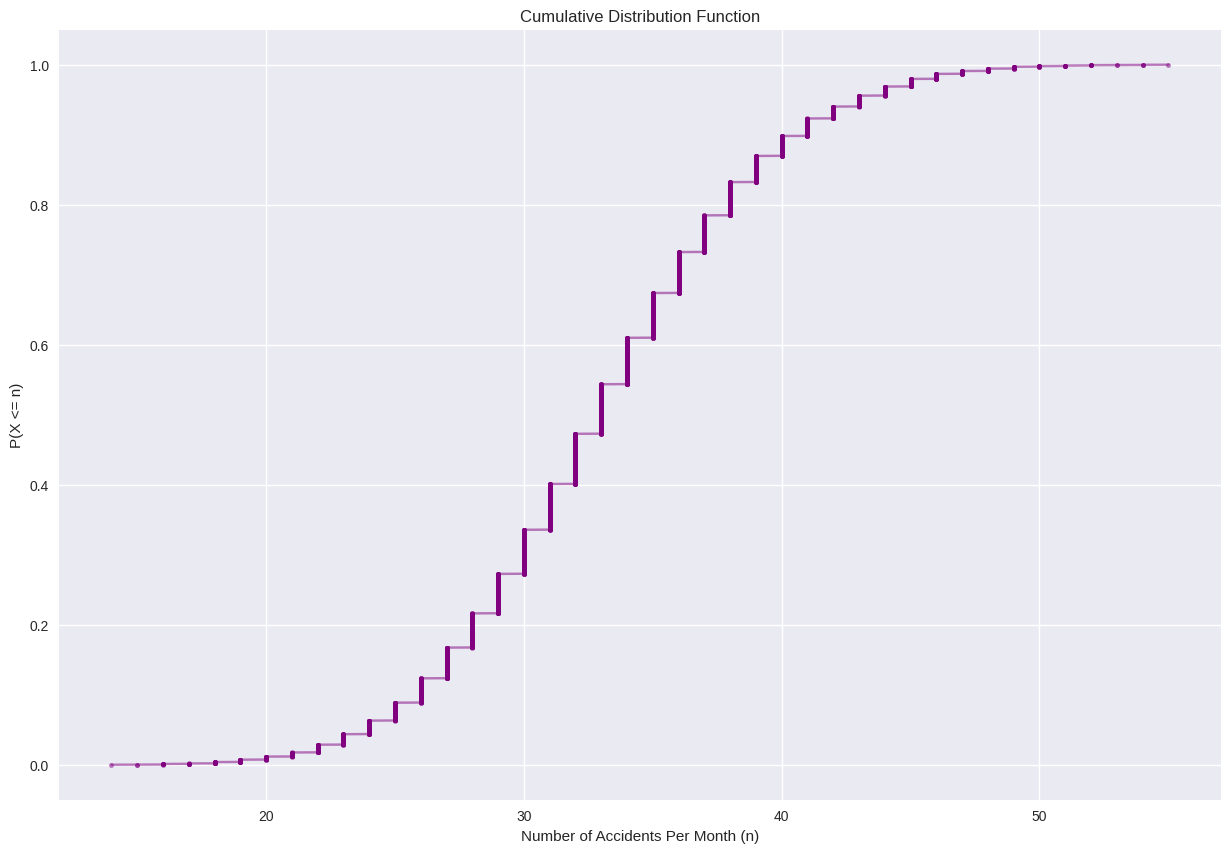

In [15]:
import math
import matplotlib.pyplot as plt

X = {}
for i in range(66): #calculate probabilities for each value of n between 0 and 66
    X[i] = math.pow(2.71828,-1*33) * math.pow(33,i)/math.factorial(i)

p_poisson = pd.DataFrame(X.items(), columns=['X','PX'])

plt.style.use('seaborn')

fig = plt.subplots(figsize = (15,10))
plt.plot(p_poisson['X'],p_poisson['PX'] , marker='.', color = 'purple', linestyle='solid')
plt.xlabel('Number of Accidents Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Probability Mass Function')
plt.show()

plt.close()

def cdf(data): #form a cumulative distribution function for data
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

np.random.seed(42)
samples_poisson = np.random.poisson(33,10000) #select a random sample of 3000 from a Poisson Distribution with mean = 33

x,y = cdf(samples_poisson)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, marker='.', alpha = 0.5, color = 'purple', linestyle='solid')
plt.xlabel('Number of Accidents Per Month (n)')
plt.ylabel('P(X <= n)')
plt.title('Cumulative Distribution Function')
plt.show()


#Exponential Distribution:

The Exponential Distribution is sometimes used to model the time that elapses before an event occurs. In addition, if events follow a Poisson process with a rate parameter of number of events per interval, then the waiting time from any starting point until the next event follows an exponential distribution with the same parameter of number of events per interval.

Using Pandas, we can calculate time between accidents for each accident in our sample. Then we use NumPy to estimate mean time in hours between accidents as a parameter for exponential distribution. Then we plot the cumulative distribution function of our sample data with a random sample of size 3000 generated from an exponential distribution to compare how well our actual data fits the exponential distribution model.

Mean time between accidents (h): 22.033076831305177


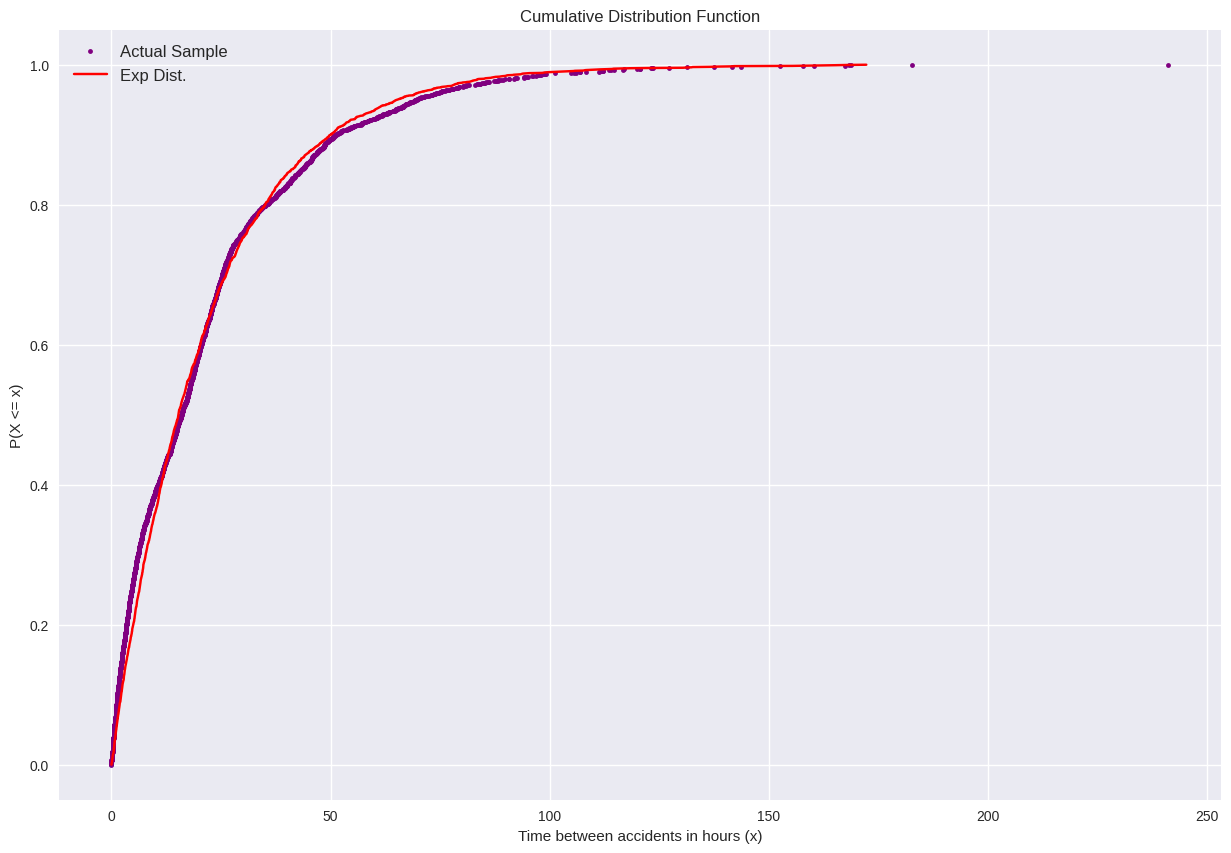

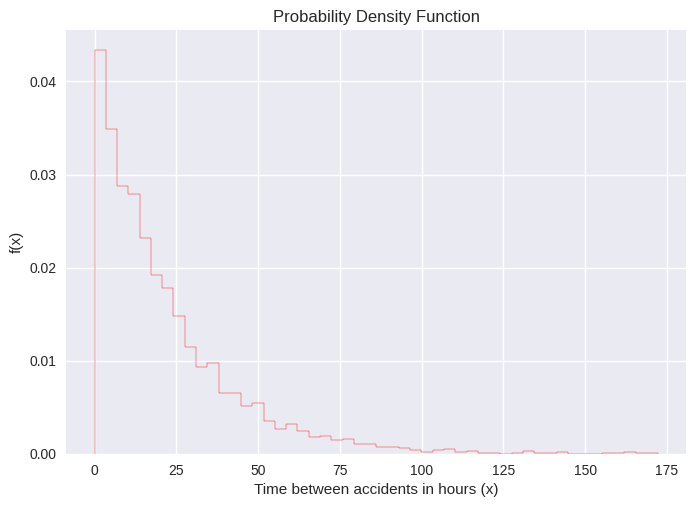

In [16]:
data.sort_values(by=['Accident Date/Time'], ascending = True, inplace = True)
data['timetoAccident'] = data['Accident Date/Time'].diff() #compute time between each accident
data['timetoAccident_h'] = data.apply(lambda x: x['timetoAccident'].days * 24 + x['timetoAccident'].seconds/3600, axis = 1)
data= data[data.timetoAccident.notnull()]

mean = np.mean(data['timetoAccident_h']) #parameter for exponential distribution

print('Mean time between accidents (h): {0}'.format(mean))



x,y = cdf(data['timetoAccident_h']) #cumulative distribution for accidents data

samples_exp =np.random.exponential(mean,size=3000) #random sample from exponential distribution
x_theor_exp,y_theor_exp = cdf(samples_exp)

fig = plt.subplots(figsize = (15,10))
_ = plt.plot(x, y, label = 'Actual Sample', marker='.', linestyle='none', color = 'purple')
_ = plt.plot(x_theor_exp, y_theor_exp,label = 'Exp Dist.', color = 'red', linestyle='solid')
_ = plt.legend(fontsize = 'large')
_ = plt.xlabel('Time between accidents in hours (x)')
_ = plt.ylabel('P(X <= x)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.close()

__ = plt.hist(samples_exp, bins = 50, density = True, histtype = 'step', color = 'red')
__ = plt.xlabel('Time between accidents in hours (x)')
__ = plt.ylabel('f(x)')
__ = plt.title('Probability Density Function')
plt.show()

plt.close()

#Mean time between accidents (h): 22.03307683130523

#Confidence Interval:

The confidence interval of sample has two parts associated with it. The first part is the that it gives a range of values i.e. a lower bound and an upper bound between which the true mean of the population can lie. The second part is the significance level of the range of values. Putting it altogether, if the data was sampled in the same way again and again, the range of values for which the true population mean was captured x% of times represents an x% confidence interval on that range of mean values. So, to calculate the confidence interval of the mean time to accidents of oil pipelines accidents in US dataset, repetition of this process is needed multiple times to get a range of values of mean where the true population mean would lie. But repeating this process i.e. oil pipeline accidents several times is practically impossible. However, theoretically these experiments can be repeated as many numbers of times as needed using Bootstrapping.

Bootstrap sampling is the use of resampled data to perform statistical inference i.e. to repeat the experiment under same conditions, a random sample with replacement of size n can repeatedly sampled from sample data. Using NumPy, bootstrap samples can be easily computed in python for our accidents data.

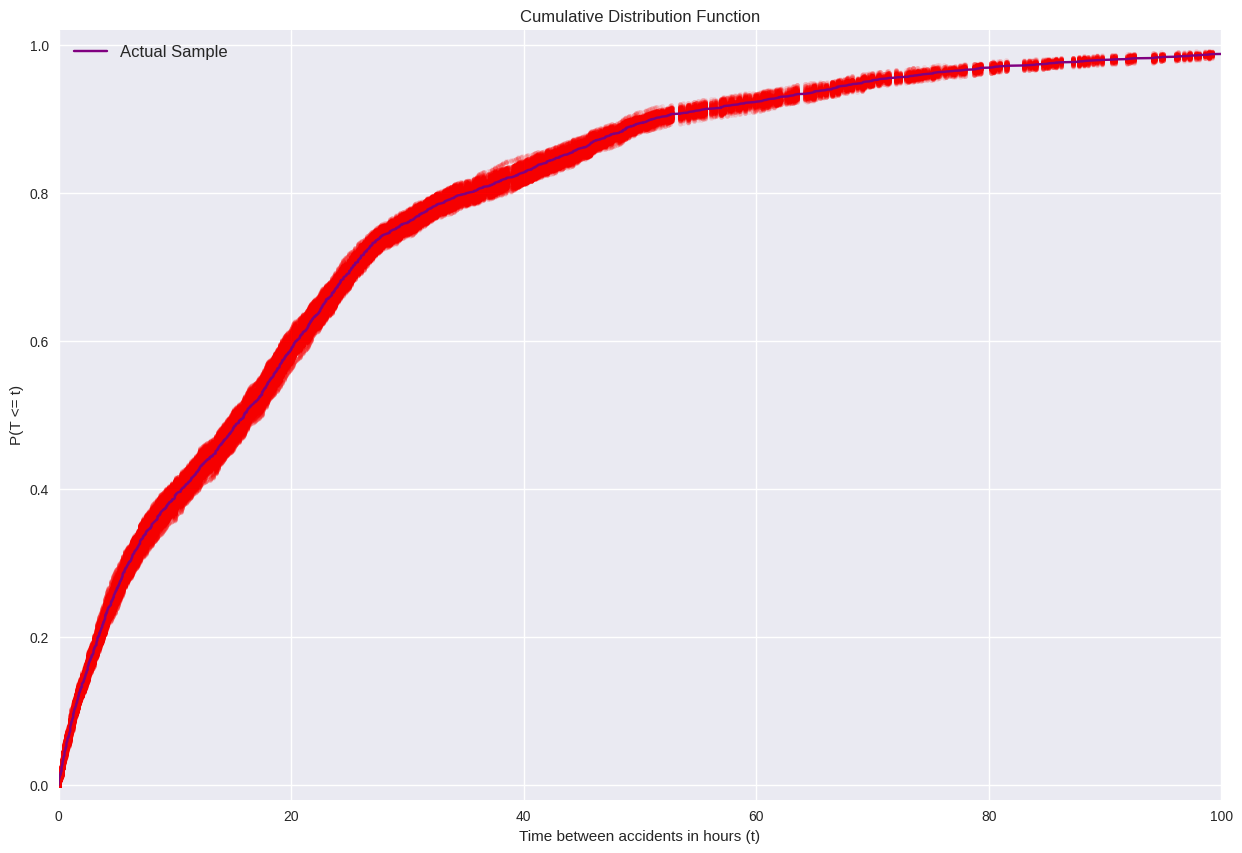

In [17]:
fig = plt.subplots(figsize = (15,10))
___ =plt.gca()
___.set_xlim([0,100])

for a in range(100):
    bs_sample = np.random.choice(data['timetoAccident_h'], size=len(data['timetoAccident_h']))
    x, y = cdf(bs_sample)
    ___ = plt.plot(x, y, marker='.', linestyle = 'none',
                 color='red', alpha=0.1)

x, y = cdf(data['timetoAccident_h'])
___ = plt.plot(x, y, label = 'Actual Sample', color = 'purple',linestyle = 'solid')

___ = plt.margins(0.02)
___ = plt.legend(fontsize = 'large')
___ = plt.xlabel('Time between accidents in hours (t)')
___ = plt.ylabel('P(T <= t)')
plt.title('Cumulative Distribution Function')
plt.show()

plt.savefig('bssamples.png')

plt.close()

#BootStrap Replicate:

The distribution of 100 bootstrap samples is plotted on top of the actual data and as expected, the samples vary slightly from the actual sample while still closely maintaining the exponential distribution. The above plot has been zoomed to focus on the variation in samples. We now simply need the mean of each of our samples to compute a confidence interval on the sample mean. A statistic computed from a bootstrap sample is called a bootstrap replicate.

95% confidence interval = [21.15700728 22.9357531 ] hours


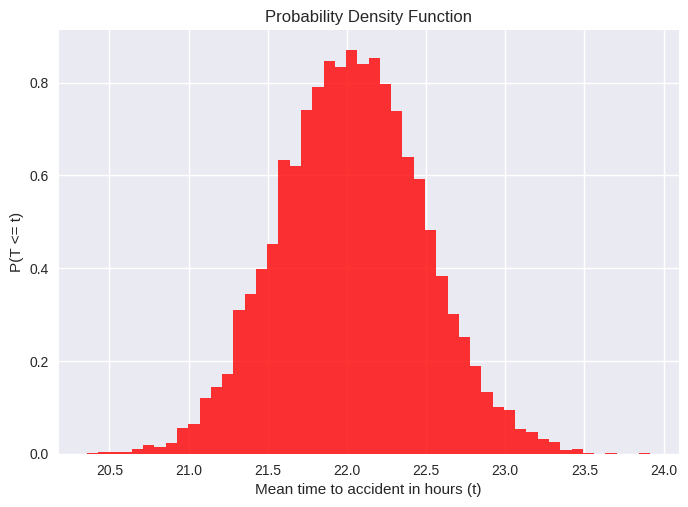

In [18]:
def bootstrap_replicate_1d(data, func):
    #Generate bootstrap replicate of
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    #Draw bootstrap replicates

    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

bs_replicates = draw_bs_reps(data['timetoAccident_h'], np.mean, size=10000)

conf_int = np.percentile(bs_replicates,[2.5, 97.5])
print('95% confidence interval =', conf_int, 'hours')


____ = plt.hist(bs_replicates, bins=50, density=True, alpha = .8, color = 'red')
____ = plt.xlabel('Mean time to accident in hours (t)')
____ = plt.ylabel('P(T <= t)')
____ = plt.title('Probability Density Function')

plt.show()


### TASK 2: Genration of Visuals (30%)
#### In this task you are required to generate all visuals in a different type of visualizations i.e., replace boxplots with bar chart, graphs etc.

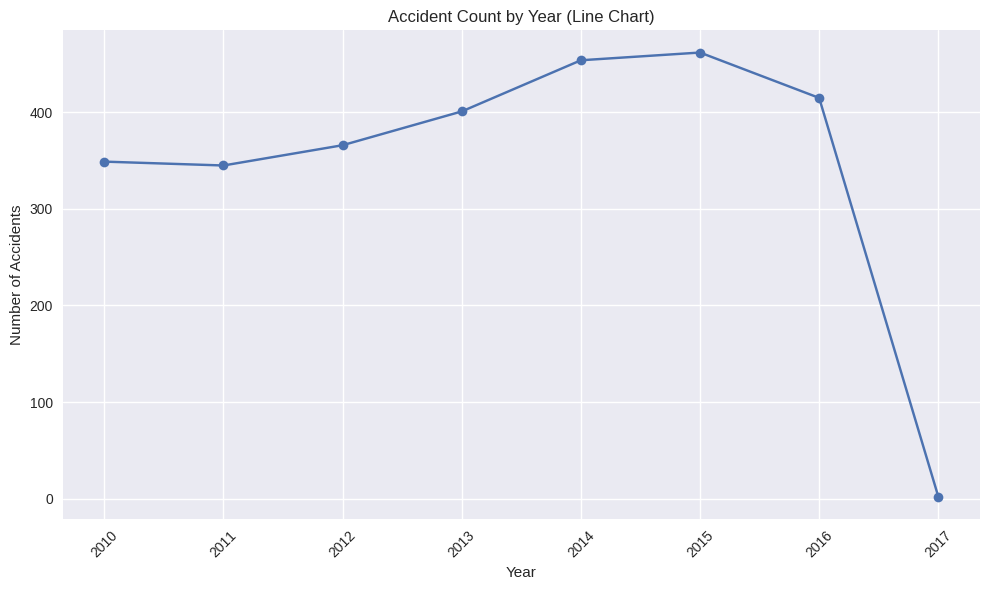

In [21]:
#Visual 1

data['Accident Date/Time'] = pd.to_datetime(data['Accident Date/Time'])
data['Accident Year'] = data['Accident Date/Time'].dt.year
accidents_per_year = data['Accident Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Count by Year (Line Chart)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


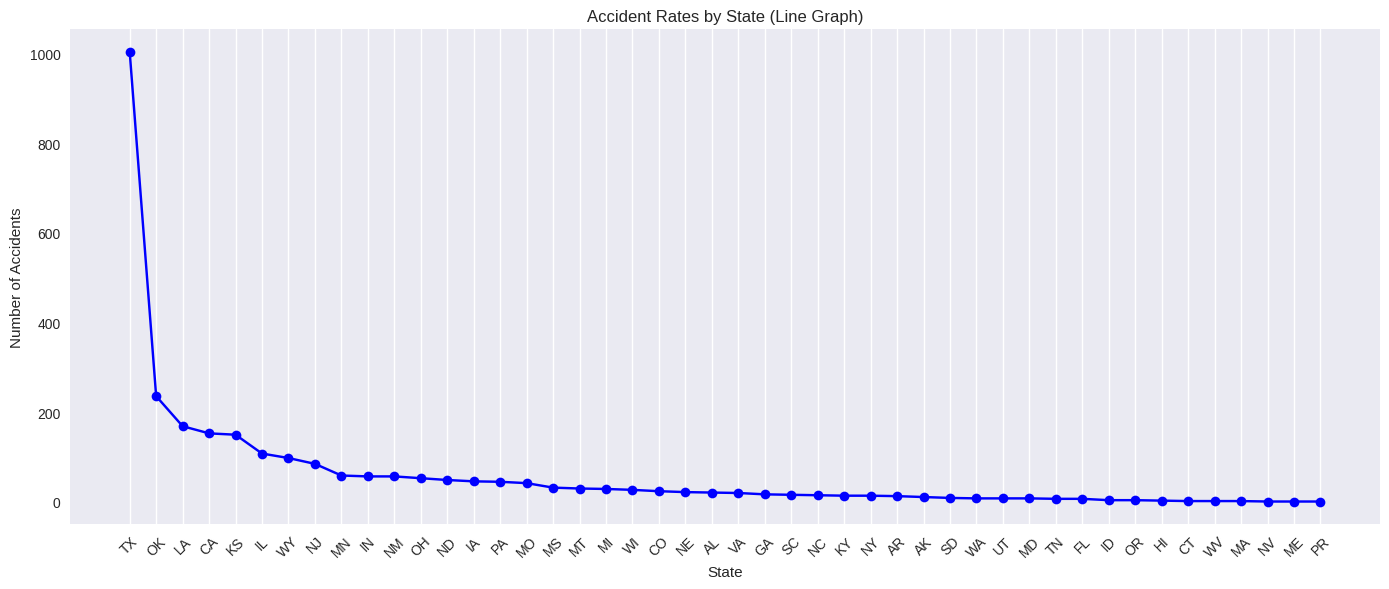

In [23]:
#Visual 2
plt.figure(figsize=(14, 6))
state_accident_counts.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Accident Rates by State (Line Graph)')
plt.grid(axis='y')
plt.xticks(rotation=45, ticks=range(len(state_accident_counts)), labels=state_accident_counts.index)
plt.tight_layout()
plt.show()


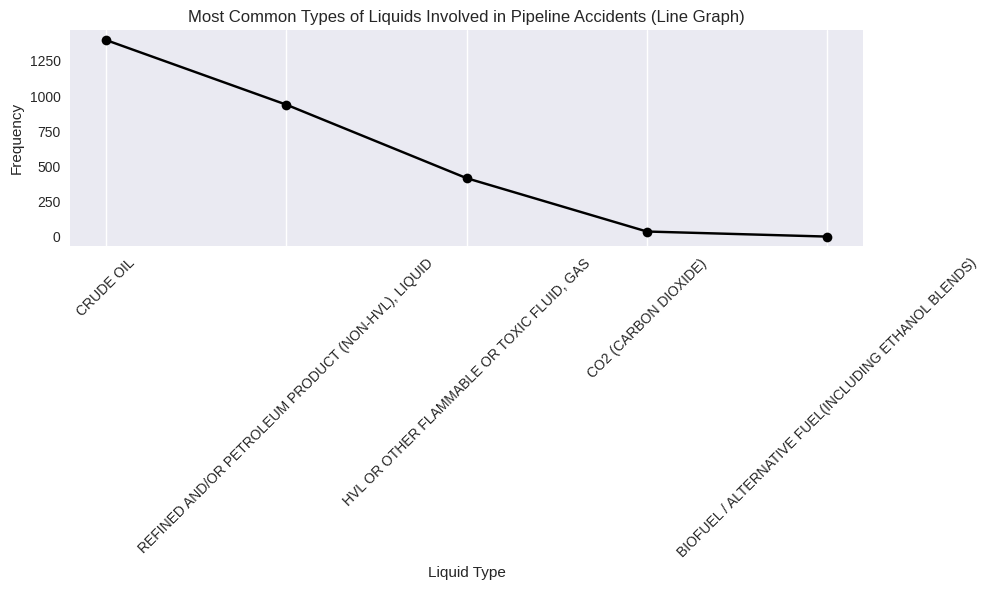

In [24]:
#Visual 3

liquid_frequency = data['Liquid Type'].value_counts()
plt.figure(figsize=(10, 6))
liquid_frequency.plot(kind='line', color='black', marker='o', linestyle='-')
plt.xlabel('Liquid Type')
plt.ylabel('Frequency')
plt.title('Most Common Types of Liquids Involved in Pipeline Accidents (Line Graph)')
plt.grid(axis='y')
plt.xticks(rotation=45, ticks=range(len(liquid_frequency)), labels=liquid_frequency.index)
plt.tight_layout()
plt.show()



<ipython-input-25-d6af66b4512d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


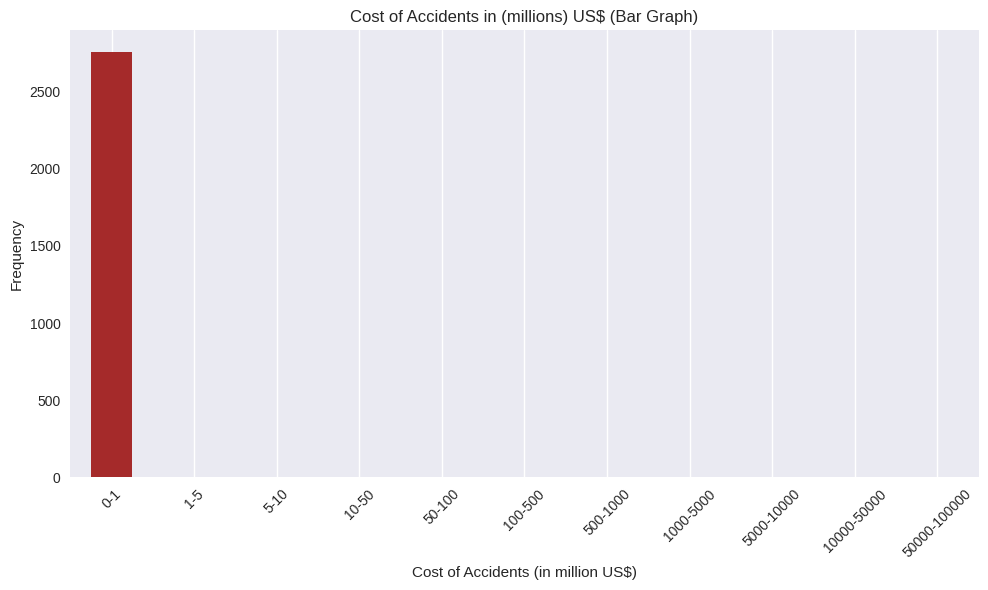

In [25]:
#Visual 4

data['All Costs'] = data['All Costs'] / 1000000

plt.style.use('seaborn')

cost_bins = [0, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]
cost_labels = ['0-1', '1-5', '5-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000-50000', '50000-100000']
cost_frequency = pd.cut(data['All Costs'], bins=cost_bins, labels=cost_labels).value_counts()

plt.figure(figsize=(10, 6))
cost_frequency.plot(kind='bar', color='brown')
plt.xlabel('Cost of Accidents (in million US$)')
plt.ylabel('Frequency')
plt.title('Cost of Accidents in (millions) US$ (Bar Graph)')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-27-c2ce980fc182>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


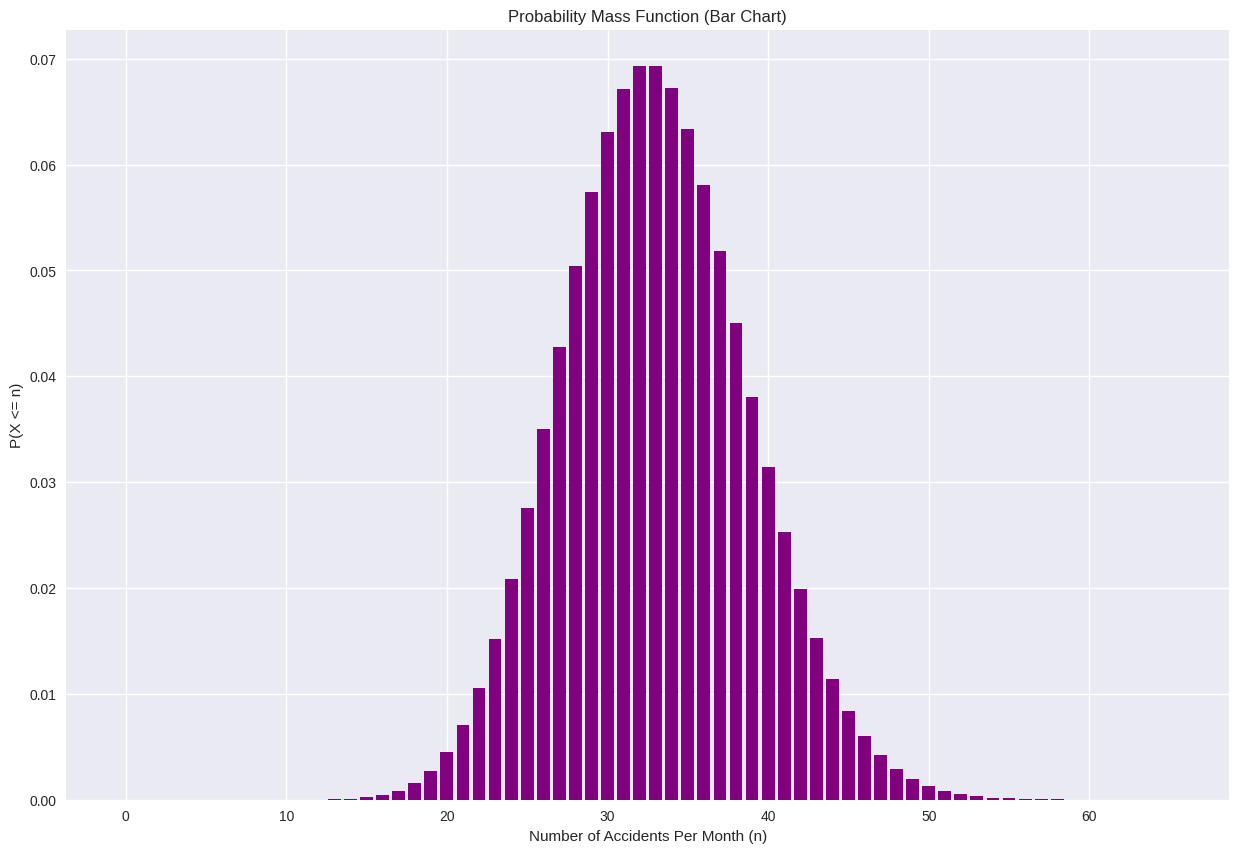

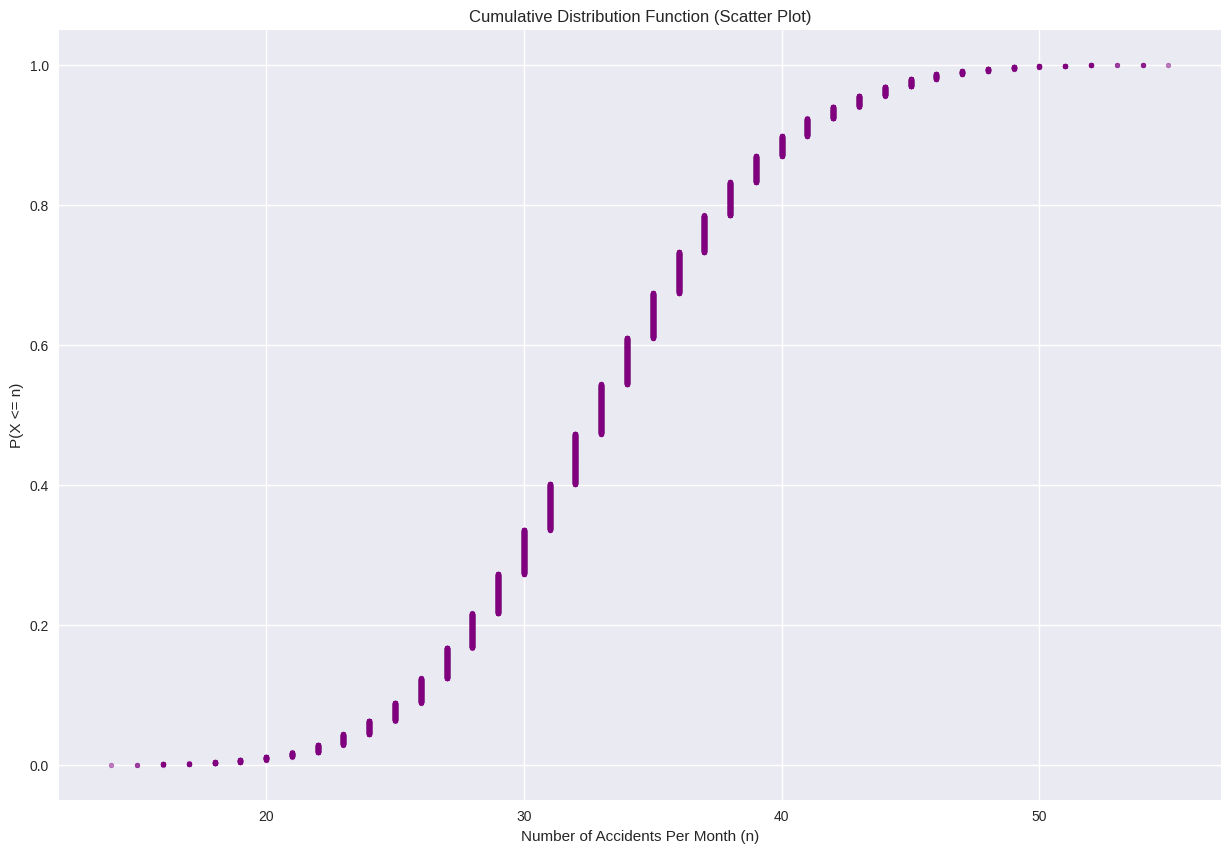

In [27]:
#visual 5

X = {}
for i in range(66):
    X[i] = math.pow(2.71828,-1*33) * math.pow(33,i)/math.factorial(i)


p_poisson = pd.DataFrame(X.items(), columns=['X','PX'])

plt.style.use('seaborn')


fig, ax = plt.subplots(figsize = (15,10))
ax.bar(p_poisson['X'], p_poisson['PX'], color='purple')
ax.set_xlabel('Number of Accidents Per Month (n)')
ax.set_ylabel('P(X <= n)')
ax.set_title('Probability Mass Function (Bar Chart)')
plt.show()

def cdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

np.random.seed(42)
samples_poisson = np.random.poisson(33,10000)


x, y = cdf(samples_poisson)

fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(x, y, marker='.', alpha=0.5, color='purple')
ax.set_xlabel('Number of Accidents Per Month (n)')
ax.set_ylabel('P(X <= n)')
ax.set_title('Cumulative Distribution Function (Scatter Plot)')
plt.show()


Mean time between accidents (h): 22.014739229024944


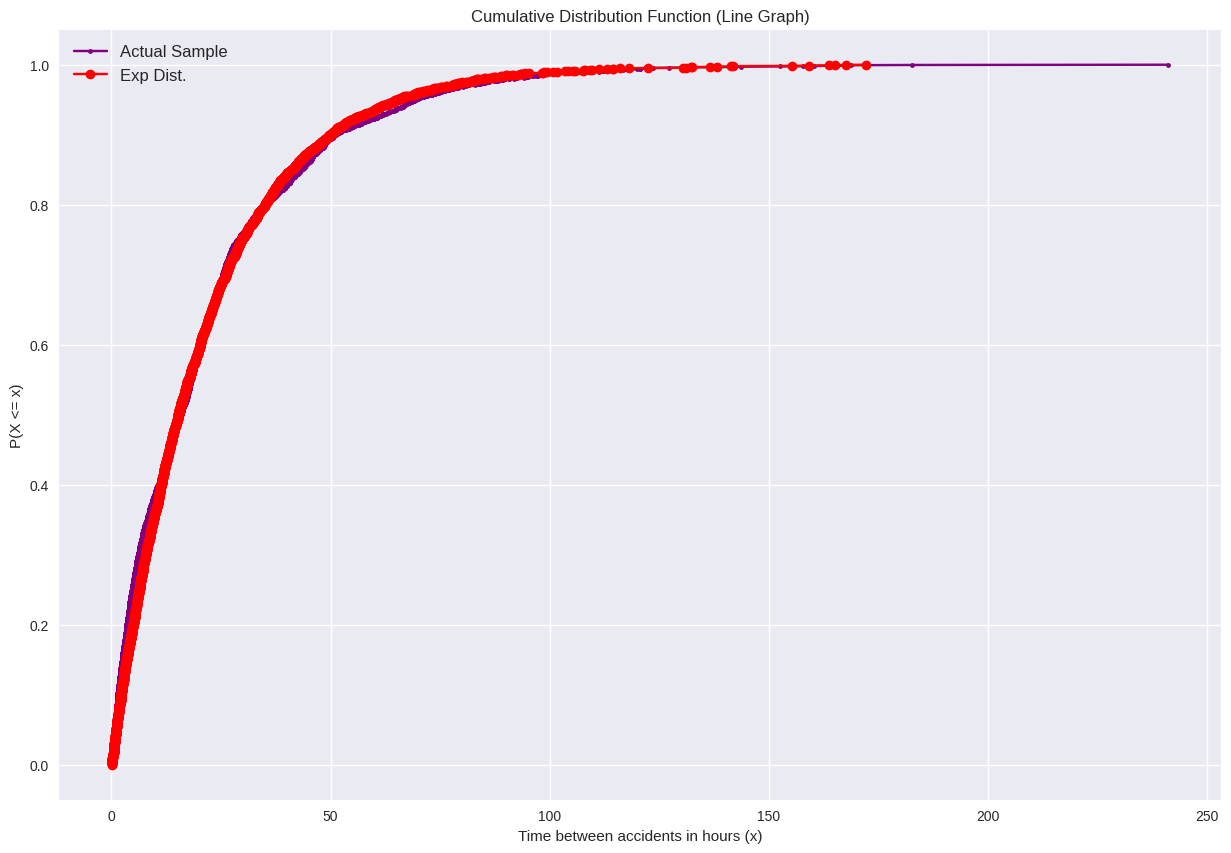

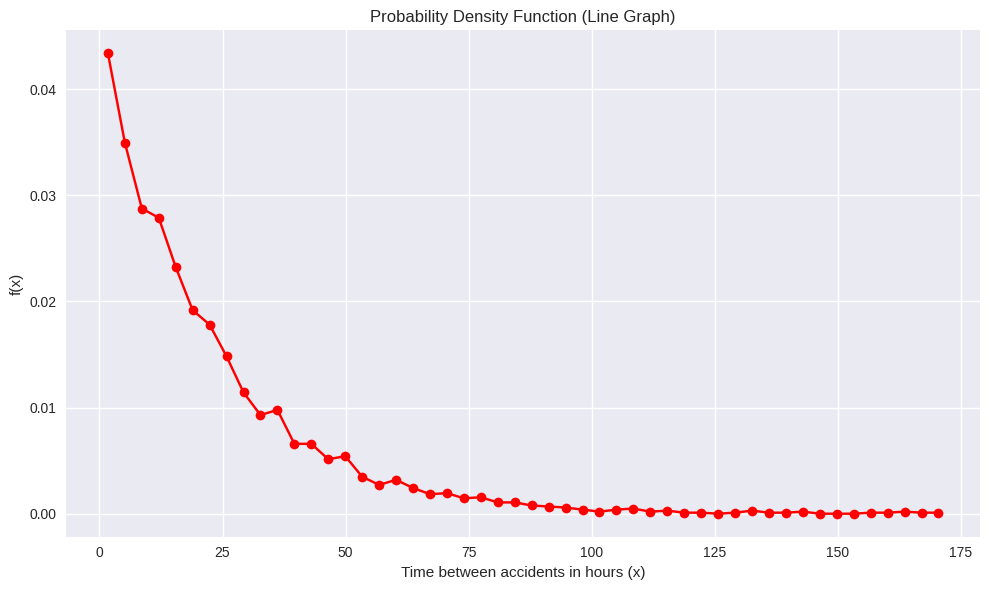

In [28]:
# visual 6
data.sort_values(by=['Accident Date/Time'], ascending=True, inplace=True)

data['timetoAccident'] = data['Accident Date/Time'].diff()
data['timetoAccident_h'] = data.apply(lambda x: x['timetoAccident'].days * 24 + x['timetoAccident'].seconds/3600 if x['timetoAccident'] is not pd.NaT else 0, axis=1)
data = data[data.timetoAccident.notnull()]

mean = np.mean(data['timetoAccident_h'])

print('Mean time between accidents (h): {0}'.format(mean))

x, y = cdf(data['timetoAccident_h'])

samples_exp = np.random.exponential(mean, size=3000)
x_theor_exp, y_theor_exp = cdf(samples_exp)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(x, y, label='Actual Sample', marker='.', linestyle='-', color='purple')
ax.plot(x_theor_exp, y_theor_exp, label='Exp Dist.', marker='o', linestyle='-', color='red')
ax.legend(fontsize='large')
ax.set_xlabel('Time between accidents in hours (x)')
ax.set_ylabel('P(X <= x)')
ax.set_title('Cumulative Distribution Function (Line Graph)')
plt.show()

plt.close()

pdf_values, bin_edges = np.histogram(samples_exp, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10, 6))
plt.plot(bin_centers, pdf_values, color='red', linestyle='-', marker='o')
plt.xlabel('Time between accidents in hours (x)')
plt.ylabel('f(x)')
plt.title('Probability Density Function (Line Graph)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.close()


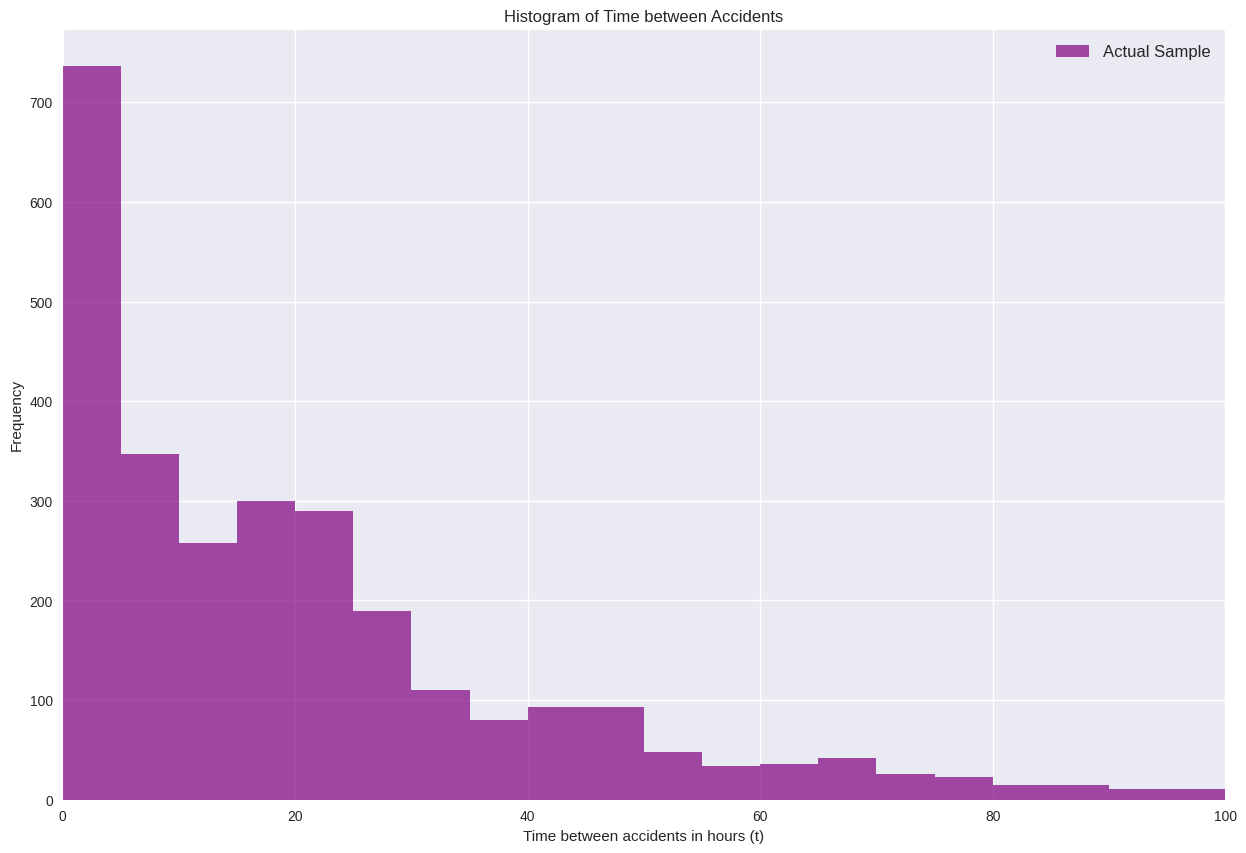

In [30]:
# visual 7
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a dataset 'data' with the column 'timetoAccident_h'

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlim([0, 100])

# Create a histogram of the 'timetoAccident_h' data
hist_data = data['timetoAccident_h']
hist_bins = np.arange(0, 101, 5)  # Define bin edges for the histogram
ax.hist(hist_data, bins=hist_bins, color='purple', alpha=0.7, label='Actual Sample')

ax.set_xlabel('Time between accidents in hours (t)')
ax.set_ylabel('Frequency')
ax.legend(fontsize='large')
plt.title('Histogram of Time between Accidents')
plt.grid(True)

plt.savefig('histogram.png')
plt.show()
plt.close()


95% confidence interval = [21.12821235 22.90437433] hours


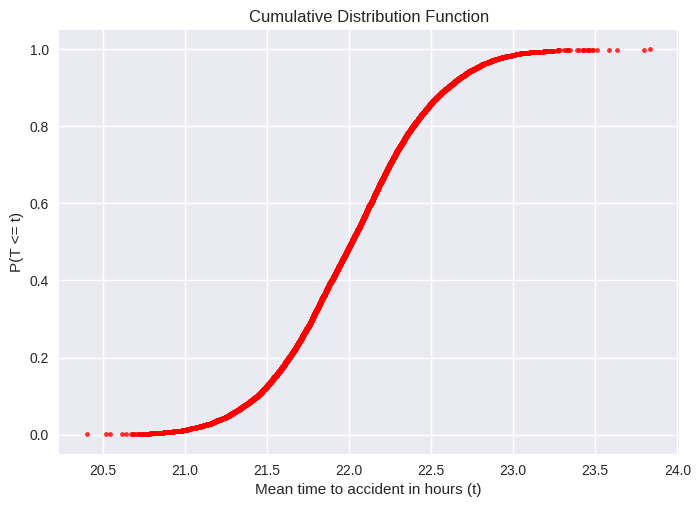

In [31]:
#Visual 8
import numpy as np
import matplotlib.pyplot as plt

# Define the functions for bootstrap resampling
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Generate bootstrap replicates of the mean
bs_replicates = draw_bs_reps(data['timetoAccident_h'], np.mean, size=10000)

# Calculate the 95% confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'hours')

# Create a CDF plot of the bootstrap replicates
x = np.sort(bs_replicates)
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y, marker='.', linestyle='none', color='red', alpha=0.8)
plt.xlabel('Mean time to accident in hours (t)')
plt.ylabel('P(T <= t)')
plt.title('Cumulative Distribution Function')
plt.grid(True)
plt.show()
